# オーディオ特徴量の傾向調査
Spotify APIが独自に提供しているオーディオ特徴量など、分析に使用できそうな特徴量の傾向を調査する。

対象の特徴量は以下の通り
```text
    "duration": "曲長[s]",
    "loudness": "平均ラウドネス[dB]",
    "tempo": "テンポ(BPM)",
    "danceability": "danceability",
    "energy": "energy",
    "speechiness": "speechiness",
    "acousticness": "acousticness",
    "instrumentalness": "instrumentalness",
    "liveness": "liveness",
    "valence": "valence",
    "time_signature": "拍子",
    "key": "キー",
    "mode": "長短長",

```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

from music_analysis import REPO_ROOT
from music_analysis.preprocess.retrieve import TrackRetriever
from music_analysis.preprocess.tables import TrackInfoTable

# 日本語フォントの設定
mpl.rcParams["font.family"] = "Hiragino Sans"

load_dotenv(REPO_ROOT / ".env")

True

分析対象のプレイリスト

In [3]:
# Spotify Japan 急上昇チャート (2024/3/16付)を使用してみる
playlist_id = "37i9dQZF1DX9vYRBO9gjDe"

In [4]:
client_credentials_manager = SpotifyClientCredentials(
    os.environ["SPOTIPY_CLIENT_ID"], os.environ["SPOTIPY_CLIENT_SECRET"]
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
track_retriever = TrackRetriever(sp)
tracks = track_retriever.glob_playlist_tracks(playlist_id)

2024-03-19 08:46:52 - music_analysis.preprocess.retrieve - INFO - retrieve:79 - This playlist inclues 50 tracks


In [6]:
track_info_table = TrackInfoTable(sp=sp, tracks=tracks)
track_info_df = track_info_table.get_track_info_df()
track_info_df

,トラックID,アーティストID,アルバムID,トラック名,アーティスト名,アルバム名,アルバム種別,リリース日,リリース日の精度,人気度,...,energy,speechiness,acousticness,instrumentalness,liveness,valence,拍子,キー,長短長,曲長[s]
0,4hsEFcCA7AL5hlKG4PRp2Z,6bDWAcdtVR3WHz2xtiIPUi,06qRSgIo9l4Gf7ACV6JZQq,Michi Teyu Ku (Overflowing),Fujii Kaze,Michi Teyu Ku (Overflowing),single,2024-03-14,day,54,...,0.591,0.0336,0.473,0.0523,0.107,0.429,4,A,Major,310.997009
1,7cIn67LEvk16v6komC8znS,7n2Ycct7Beij7Dj7meI4X0,575TQDOQqc0MAheeEeKWUR,ONE SPARK,TWICE,With YOU-th,single,2024-02-23,day,81,...,0.766,0.0727,0.0151,0.0,0.753,0.413,4,E,Minor,183.559006
2,38Ypb7FJIGVovqqQO2Yu5S,0pWR7TsFhvSCnbmHDjWgrE,1A68DtaRuQEtOfIHkB8C2p,二度寝,Creepy Nuts,二度寝,single,2024-01-27,day,71,...,0.888,0.14,0.0478,0.0233,0.11,0.201,4,D,Major,207.186996
3,3ElzGGiQ4ehegbG7dLIka7,4XFkDALFTsSHVnRtJSsaMN,5XTwspNzdT9uowVAd6nBbg,FUJI,Number_i,GOAT,single,2024-03-06,day,67,...,0.826,0.157,0.0259,0.000031,0.146,0.375,4,A,Major,162.242004
4,21JQaUURrZvW2SutiOtX1Y,1t17z3vfuc82cxSDMrvryJ,4WDo7ma5e2z6bqjcbQkz2w,月へ行こう,Macaroni Empitsu,月へ行こう,single,2024-03-08,day,59,...,0.684,0.0774,0.0619,0.0,0.114,0.645,4,D♯/E♭,Minor,198.369995
5,096KHkONhQm4MQNH35mU22,2UMMVk4WPg6pKXQGvufnuG,4hHgHqD2J1D4bvlzmzzCeT,鬼ノ宴,友成空,鬼ノ宴,single,2024-01-10,day,72,...,0.536,0.0427,0.0141,0.000007,0.0376,0.978,4,F♯/G♭,Major,175.998001
6,0JcI7OdALbpSFkyKoufRYs,4QvgGvpgzgyUOo8Yp8LDm9,3bRSI9DOQA2KdJ7t6zdW0V,ロマンチシズム,Mrs. GREEN APPLE,Attitude,album,2019-10-01,day,69,...,0.878,0.0634,0.0038,0.0,0.0468,0.901,4,A♯/B♭,Major,213.613007
7,0PBTlQ84CBJF0tBnKGmQa6,3JsHnjpbhX4SnySpvpa9DK,7v4sqd0NZ9Fm8HnwCcCGIs,FRI(END)S,V,FRI(END)S,single,2024-03-15,day,83,...,0.601,0.053,0.0315,0.0,0.0927,0.627,4,G♯/A♭,Major,148.082001
8,4UfLvlSUTBVn5imuzf87kj,7HwzlRPa9Ad0I8rK0FPzzK,1e1wT6uxWS5EwnHVeu6K0b,タイムマシン,SEKAI NO OWARI,Nautilus,album,2024-03-13,day,47,...,0.667,0.0264,0.174,0.000005,0.361,0.635,4,F♯/G♭,Major,258.812988
9,51ZQ1vr10ffzbwIjDCwqm4,66CXWjxzNUsdJxJ2JdwvnR,5EYKrEDnKhhcNxGedaRQeK,we can't be friends (wait for your love),Ariana Grande,eternal sunshine,album,2024-03-08,day,91,...,0.663,0.0447,0.0657,0.000032,0.0751,0.287,4,F,Major,228.639008


### 基礎分析

分析対象の曲数

In [7]:
len(track_info_df)

50

In [8]:
track_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   トラックID            50 non-null     category      
 1   アーティストID          50 non-null     category      
 2   アルバムID            50 non-null     category      
 3   トラック名             50 non-null     category      
 4   アーティスト名           50 non-null     category      
 5   アルバム名             50 non-null     category      
 6   アルバム種別            50 non-null     category      
 7   リリース日             50 non-null     datetime64[ns]
 8   リリース日の精度          50 non-null     category      
 9   人気度               50 non-null     category      
 10  平均ラウドネス[dB]       50 non-null     Float32       
 11  テンポ(BPM)          50 non-null     Float32       
 12  danceability      50 non-null     Float32       
 13  energy            50 non-null     Float32       
 14  speechiness       50 non-nul

#### 数値変数

In [9]:
track_info_df.describe(exclude="category").round(2)

,リリース日,平均ラウドネス[dB],テンポ(BPM),danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,曲長[s]
count,50,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,2021-12-10 11:02:24,-5.28,121.07,0.62,0.72,0.07,0.16,0.01,0.18,0.56,225.32
min,1996-07-08 00:00:00,-8.31,53.38,0.28,0.28,0.03,0.0,0.0,0.03,0.15,148.08
25%,2024-01-11 18:00:00,-6.3,98.0,0.52,0.63,0.04,0.02,0.0,0.08,0.43,190.01
50%,2024-03-06 00:00:00,-5.19,123.49,0.6,0.75,0.05,0.07,0.0,0.12,0.57,217.0
75%,2024-03-13 00:00:00,-4.22,142.69,0.71,0.82,0.08,0.23,0.0,0.23,0.64,254.22
max,2024-03-15 00:00:00,-2.54,178.07,0.93,0.95,0.27,0.85,0.25,0.75,0.98,363.85
std,NaN,1.53,30.63,0.14,0.14,0.06,0.2,0.04,0.14,0.19,51.16


#### カテゴリカル変数

In [10]:
track_info_df.describe(include="category")

,トラックID,アーティストID,アルバムID,トラック名,アーティスト名,アルバム名,アルバム種別,リリース日の精度,人気度,拍子,キー,長短長
count,50,50,50,50,50,50,50,50,50,50,50,50
unique,50,50,50,50,50,50,3,1,35,3,12,2
top,02ntK5ruQ5arRCAmQVXZmz,01XYiBYaoMJcNhPokrg0l0,03GtNIvFYHk7ltVGMC3Mkh,Along the long journey,AiNA THE END,19.5,single,day,57,4,G♯/A♭,Major
freq,1,1,1,1,1,1,33,50,4,47,7,38


In [11]:
track_info_df["拍子"].value_counts()

拍子
4    47
5     2
3     1
Name: count, dtype: int64

In [12]:
track_info_df["キー"].value_counts()

キー
G♯/A♭    7
D        6
E        6
A        5
A♯/B♭    5
F        5
C        4
F♯/G♭    4
C♯/D♭    3
B        2
G        2
D♯/E♭    1
Name: count, dtype: int64

In [13]:
track_info_df["長短長"].value_counts()

長短長
Major    38
Minor    12
Name: count, dtype: int64

コメント

- 数値変数
    - 平均ラウドネスは-5dB程度で調整されている。マスタリングでこれくらいの値を目標値として調整されることが多い？
    - BPMの平均は120程度
    - `danceability` 等の英語カラムの特徴量は0から1の値が入っている
    - 曲長の平均は4分弱程度。
- カテゴリガル変数
    - 拍子は4拍子のトラックがほとんど
    - キーはG♯/A♭が最も多い
    - 調はMajorの方が多い

### 相関分析 (数値変数)

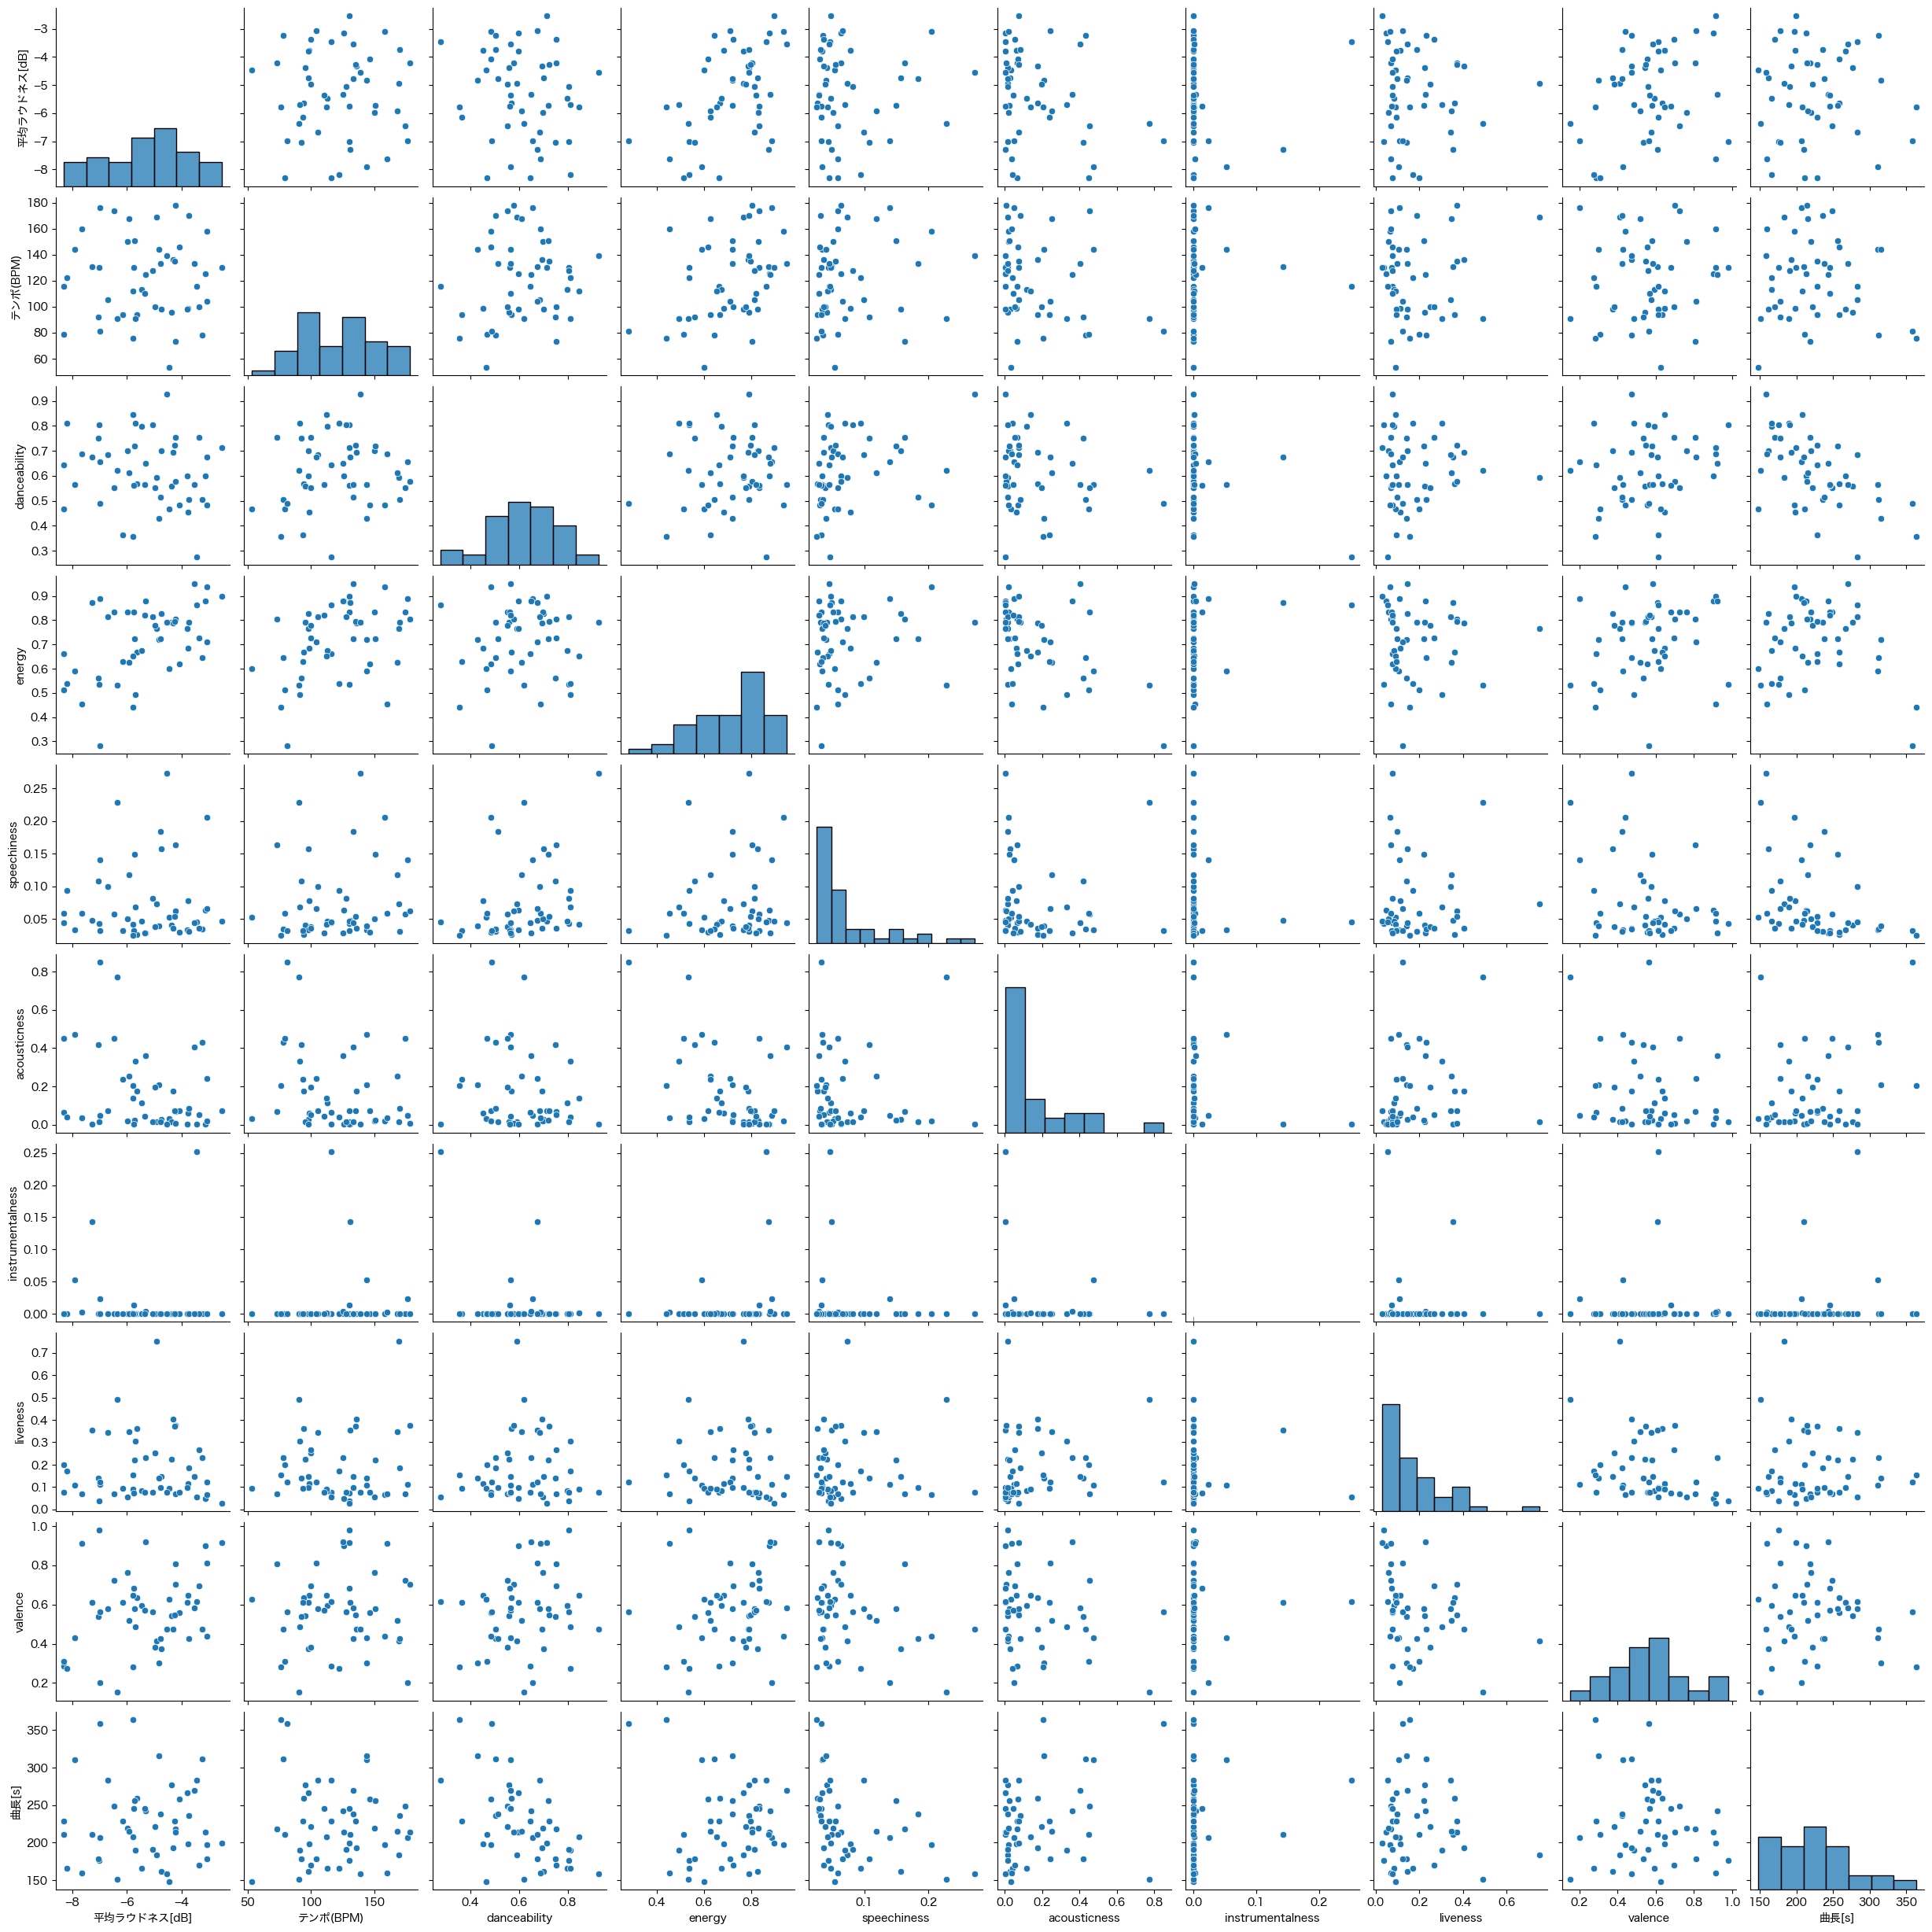

In [14]:
pg = sns.pairplot(track_info_df)

コメント (以下、目視確認の所感)

- 平均ラウドネスと`energy`、`valenceで弱い正の相関がありそう。
- テンポと`energy`で弱い正の相関がありそう。
- `danceablity`と曲調で弱い負の相関がありそう。ダンスミュージックは短い傾向がある？
- `energy`と曲調で弱い正の相関がありそう。長い曲ほどポジティブ？
- `speechiness`はいずれにおいても小さい値をとる。母集団を楽曲に限定しているため(podcastなどは含めていないので)。